# Ion Plasma Etching - Data set



**Load Packages**

In [2]:
import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from numpy import mean
from numpy import std
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from keras.regularizers import l1
import tensorflow as tf

In [3]:
pip install h5py scikit-optimize

     |████████████████████████████████| 102kB 5.7MB/s 


**Load Dataset**

In [4]:
df_Ion_Plasma= pd.read_excel("/content/sample_data/Ion_Plasma_Etching.xlsx")
df_Ion_Plasma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Run                         53 non-null     int64  
 1   Pressure                    53 non-null     int64  
 2   RF_Power                    53 non-null     int64  
 3   Electrode Gap               53 non-null     float64
 4   CCl4_Flow                   53 non-null     int64  
 5   He_Flow                     53 non-null     int64  
 6   O2_Flow                     53 non-null     int64  
 7   Etch_Rate - Rp              53 non-null     int64  
 8   Etch_Uniformity – U         53 non-null     float64
 9   Oxide_Selectivity - Sox     53 non-null     float64
 10  Photoresist_Selectivity -   53 non-null     float64
dtypes: float64(4), int64(7)
memory usage: 4.7 KB


**Remove "RUN" columns**

In [5]:
df_Ion_Plasma.head(5)
df_Ion_Plasma=df_Ion_Plasma.iloc[:,1:]
df_Ion_Plasma.head(5)

,Pressure,RF_Power,Electrode Gap,CCl4_Flow,He_Flow,O2_Flow,Etch_Rate - Rp,Etch_Uniformity – U,Oxide_Selectivity - Sox,Photoresist_Selectivity -
0,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


In [ ]:
## find out how many records missing the values and % of count
size = df_Ion_Plasma.shape[0]
print ("Total Size of the dataset : ", size)
total_na = df_Ion_Plasma.isnull().sum(axis = 0)
print ("Null values : ", total_na)
print ("PERCENTAGE : ", (total_na/size)*100)

Total Size of the dataset :  53
Null values :  Pressure                      0
RF_Power                      0
Electrode Gap                 0
CCl4_Flow                     0
He_Flow                       0
O2_Flow                       0
Etch_Rate - Rp                0
Etch_Uniformity – U           0
Oxide_Selectivity - Sox       0
Photoresist_Selectivity -     0
dtype: int64
PERCENTAGE :  Pressure                      0.0
RF_Power                      0.0
Electrode Gap                 0.0
CCl4_Flow                     0.0
He_Flow                       0.0
O2_Flow                       0.0
Etch_Rate - Rp                0.0
Etch_Uniformity – U           0.0
Oxide_Selectivity - Sox       0.0
Photoresist_Selectivity -     0.0
dtype: float64


In [ ]:
print(df_Ion_Plasma.shape)

(53, 10)


In [ ]:
df_Ion_Plasma.describe()

,Pressure,RF_Power,Electrode Gap,CCl4_Flow,He_Flow,O2_Flow,Etch_Rate - Rp,Etch_Uniformity – U,Oxide_Selectivity - Sox,Photoresist_Selectivity -
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,250.000000,350.000000,1.518868,124.962264,124.056604,15.000000,4204.283019,11.635849,6.988302,2.226981
std,45.641159,45.641159,0.285588,22.871684,62.203579,4.574175,689.441535,10.648241,2.186921,0.541315
min,131.000000,231.000000,0.800000,64.000000,0.000000,3.000000,2704.000000,0.500000,2.650000,1.320000
25%,200.000000,300.000000,1.200000,100.000000,50.000000,10.000000,3684.000000,3.900000,5.840000,1.970000
50%,250.000000,350.000000,1.500000,125.000000,125.000000,15.000000,4390.000000,8.300000,6.410000,2.100000
75%,300.000000,400.000000,1.800000,150.000000,200.000000,20.000000,4703.000000,15.100000,7.720000,2.310000
max,369.000000,469.000000,2.200000,184.000000,200.000000,27.000000,5515.000000,55.200000,15.150000,4.170000


**Look at the correlation between independent and depedent variables**

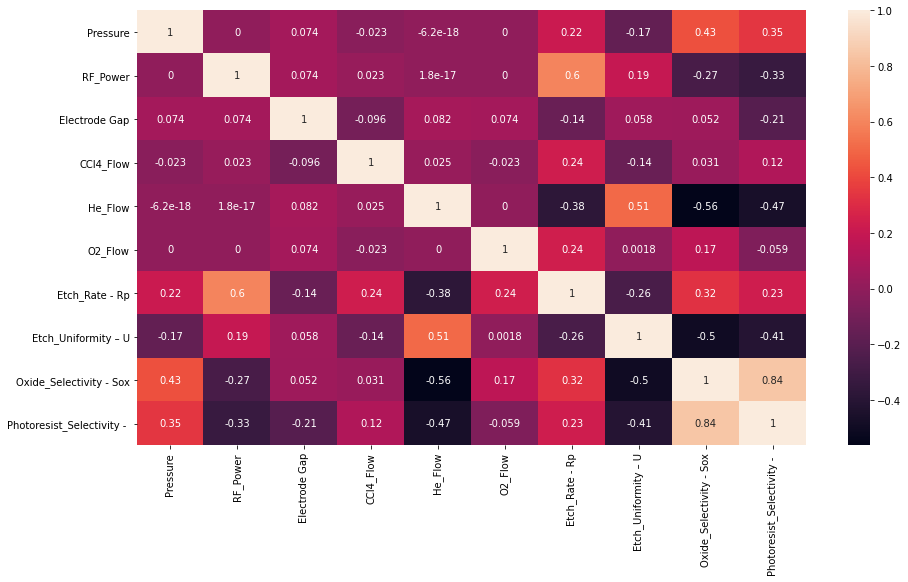

In [ ]:
#Look at the correlation of the dataset
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
corr = df_Ion_Plasma.corr()
sns.heatmap(corr, annot = True)

**Normalise the data**

In [6]:
## Normalise the data
x=df_Ion_Plasma.iloc[:, 0:6]
y=df_Ion_Plasma.iloc[:,6:]
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)


MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


**Look the distribution of indepedent variables**

[Text(0.5, 0, 'Indepedent variables')]

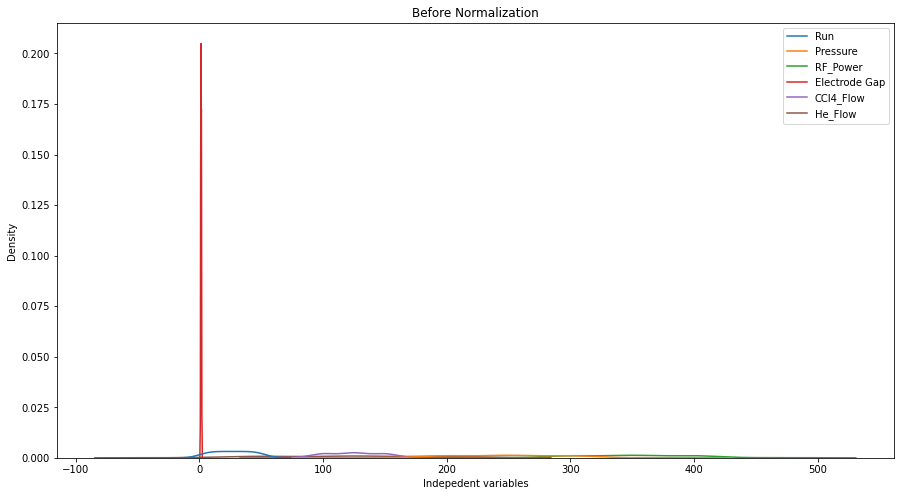

In [ ]:
#distribution of variables before normalization
import seaborn as sns
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data=x).set_title("Before Normalization")
ax.set(xlabel='Indepedent variables')


**Look the distribution of depedent variables**

[Text(0.5, 0, 'Depedent variables')]

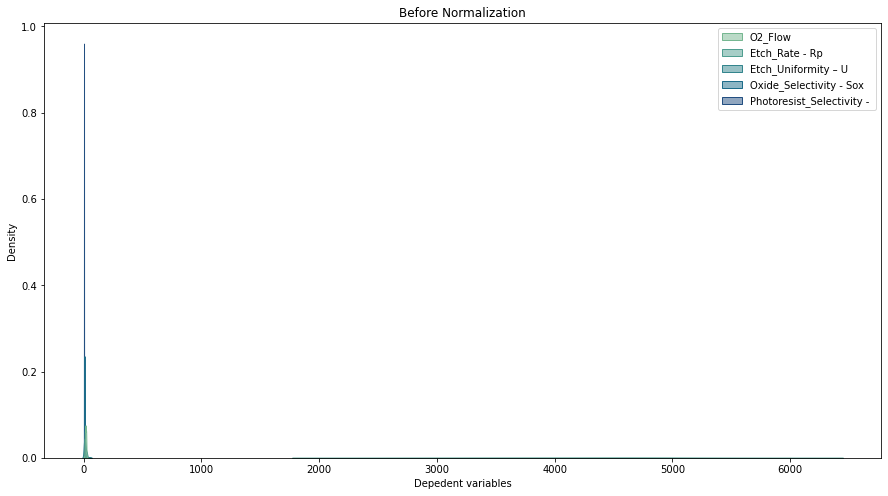

In [ ]:
#distribution of variables before normalization
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)

sns.kdeplot(data=y,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=1).set_title("Before Normalization")
ax.set(xlabel='Depedent variables')

**Look the distribution of indepedent variables after normalization**

[Text(0.5, 0, 'Indepedent variables')]

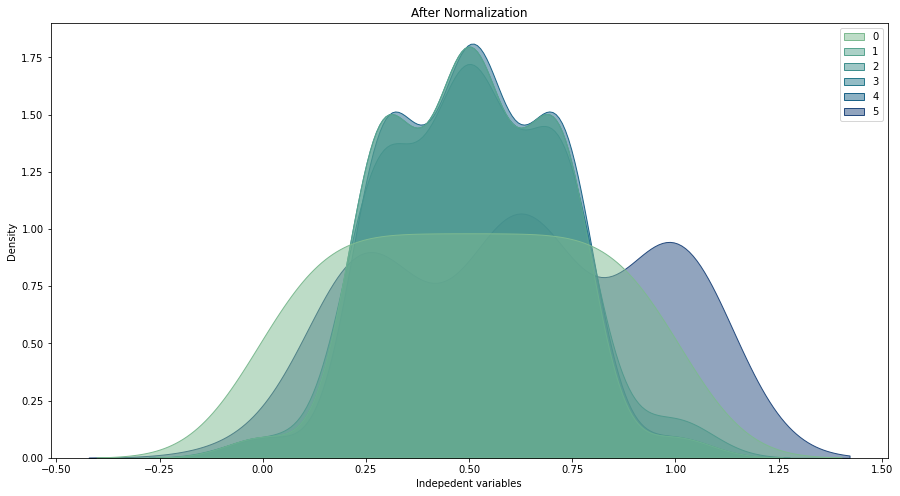

In [ ]:
#distribution of indepedent variables after normalization
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)

# plot of 2 variables
sns.kdeplot(data=xscale,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=1).set_title("After Normalization")
ax.set(xlabel='Indepedent variables')

#sns.plt.show()

[Text(0.5, 0, 'Depedent variables')]

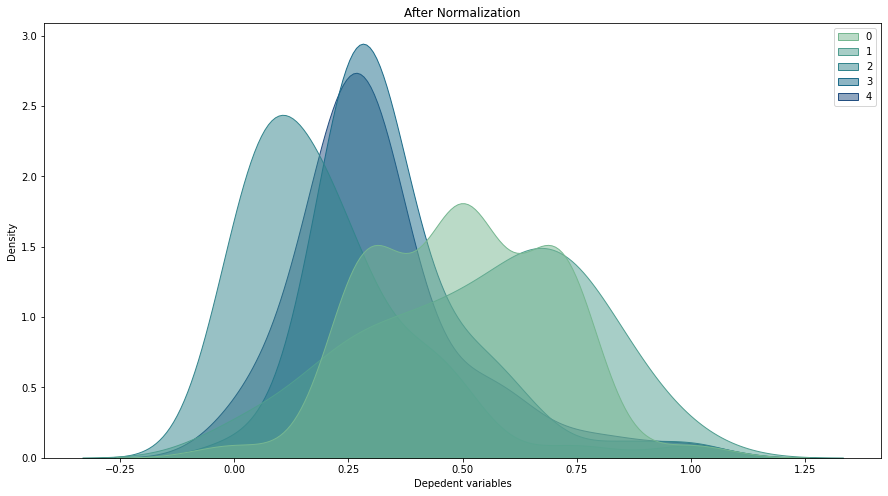

In [ ]:
#distribution of depedent variables after normalization
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)

# plot of 2 variables
sns.kdeplot(data=yscale,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=1).set_title("After Normalization")
ax.set(xlabel='Depedent variables')

**Model - One hidden layer**

In [7]:
#Create test and train data
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.10,  shuffle=True)
n_features = x.shape[1]
n_opneurons=y.shape[1]
n_features

6

In [ ]:
def get_model(input_dim, dense_0_neurons, dense_1_neurons, num_op_neurons):
  # Define the keras model
  model = Sequential()
  model.add(Dense(dense_0_neurons, input_dim=input_dim, kernel_initializer='he_normal', activation='relu', name="dense_1"))
  model.add(Dense(dense_1_neurons, activation='relu', name="dense_2"))
  model.add(Dense(num_op_neurons, activation='sigmoid', name="dense_3"))
  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
  return model

In [ ]:
#reg=[0.0001,0.001,0.01,0.1]
model=get_model(n_features,7,9,4)
history = model.fit(X_train, y_train, epochs=90, batch_size=1, validation_split=0.2,verbose=0)
# predict test set
model_predict = model.predict(X_test)
# evaluate predictions
score =  np.sqrt(metrics.mean_squared_error(model_predict, y_test))
print('RMSE: %.3f' % score)

RMSE: 0.222


In [ ]:
run=[1,2,3,4,5,6,7,8,9,10]
RMSE_M1=[]
for i in range(len(run)):
  model=get_model(n_features,7,9,4)
  model.fit(X_train, y_train, epochs=90, batch_size=1, validation_split=0.2,verbose=0)
  if(i==1):
    history = model.fit(X_train, y_train, epochs=90, batch_size=1, validation_split=0.2,verbose=0)
  model_predict = model.predict(X_test)
  score =  np.sqrt(metrics.mean_squared_error(model_predict, y_test))
  print('RMSE: %.3f' % score)
  RMSE_M1.append(score)


RMSE: 0.205
RMSE: 0.208
RMSE: 0.226
RMSE: 0.191
RMSE: 0.211
RMSE: 0.223
RMSE: 0.191
RMSE: 0.181
RMSE: 0.218
RMSE: 0.207


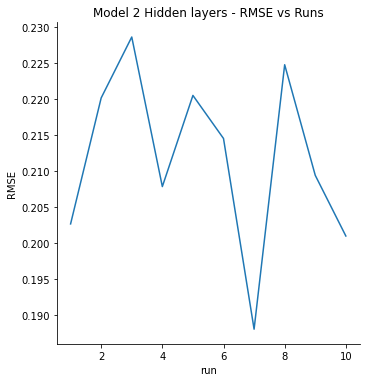

In [ ]:
#plot RMSE and runs
df_m2=pd.DataFrame({'run': run,
     'RMSE': RMSE_M2

    })

sns.relplot(data=df_m2, x="run", y="RMSE",  kind="line").set(title='Model 2 Hidden layers - RMSE vs Runs')


#sns.relplot(x="time", y="value", kind="line", data=df)


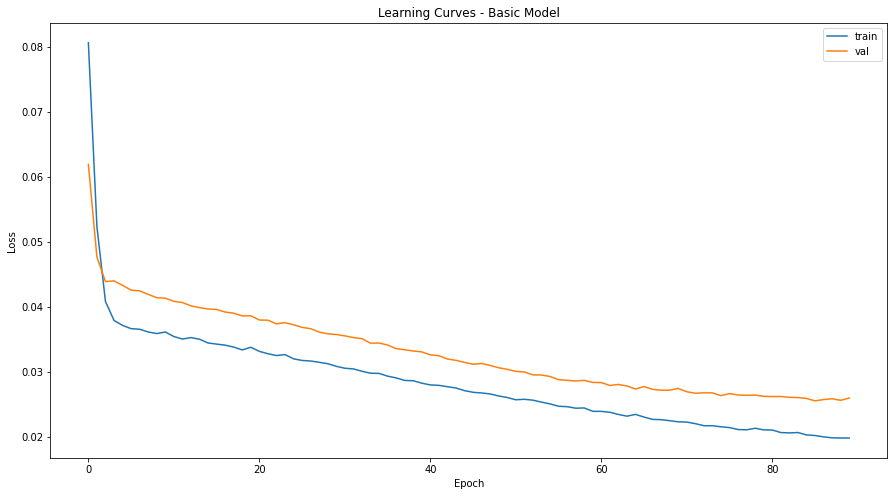

In [ ]:
# plot learning curves
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Learning Curves - Basic Model')

plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


**Analysis on Base Model:** 
For mulitple runs this models RMSE values varied from 19% to 22%.So this model is not consistent.Better to check with other parameters like additional hidden layers,regularization,etc


**Model - 2 with 2 Hidden Layers**

In [ ]:
def get_model_2hl (input_dim, dense_0_neurons, dense_1_neurons,dense_2_neurons, num_op_neurons):
  # Define the keras model
  model = Sequential()
  model.add(Dense(dense_0_neurons, input_dim=input_dim, kernel_initializer='he_normal', activation='relu', name="dense_1"))
  model.add(Dense(dense_1_neurons, activation='relu', name="dense_2"))
  model.add(Dense(dense_2_neurons, activation='relu', name="dense_3"))
  model.add(Dense(num_op_neurons, activation='sigmoid', name="dense_4"))
  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
  return model

In [ ]:
run=[1,2,3,4,5,6,7,8,9,10]
RMSE_M2=[]
for i in range(len(run)):
  model_2hl =get_model_2hl(n_features,7,5,9,4)
  history_2hl = model_2hl.fit(X_train, y_train, epochs=90, validation_split=0.2,batch_size=1,verbose=0)
  model_predict_2hl = model_2hl.predict(X_test)
# evaluate predictions
  score_2hl = np.sqrt(metrics.mean_squared_error(y_test, model_predict_2hl))
  print('RMSE: %.3f' % score_2hl)
  RMSE_M2.append(score_2hl)


RMSE: 0.203
RMSE: 0.220
RMSE: 0.229
RMSE: 0.208
RMSE: 0.221
RMSE: 0.215
RMSE: 0.188
RMSE: 0.225
RMSE: 0.209
RMSE: 0.201


In [ ]:
history_2hl.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

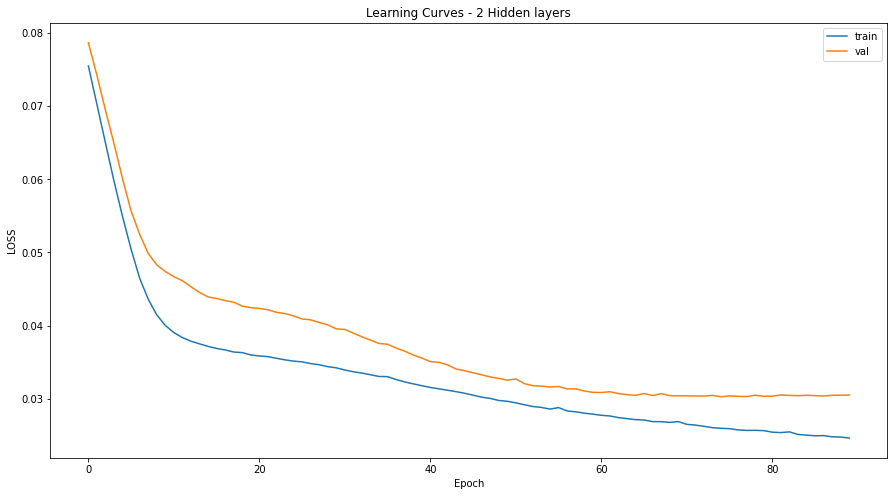

In [ ]:
# plot learning curves
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Learning Curves - 2 Hidden layers')
plt.xlabel('Epoch')
plt.ylabel('LOSS')

plt.plot(history_2hl.history['loss'], label='train')
plt.plot(history_2hl.history['val_loss'], label='val')
plt.legend()
plt.show()

**Analysis oabout Model with Hidden layers :** This model didn't result much improvement in the model performance so will move forward with other models

**Model - 3 - Regularization**

In [ ]:
def get_model_r(input_dim, dense_0_neurons, dense_1_neurons, num_op_neurons,reg):
  # Define the keras model
  model = Sequential()
  model.add(Dense(dense_0_neurons, input_dim=input_dim, kernel_initializer='he_normal', activation='relu', name="dense_1"))
  model.add(Dense(dense_1_neurons,kernel_regularizer=l1(reg), bias_regularizer=l1(reg), activation='relu', name="dense_2"))
  model.add(Dense(num_op_neurons, activation='sigmoid', name="dense_3"))
  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
  return model

In [ ]:
reg=[0.0001,0.001,0.01,0.1]
RMSE=[]
for i in range(len(reg)):
  model_r=get_model_r(n_features,7,9,4,reg[i])
  history_r = model_r.fit(X_train, y_train, epochs=90, batch_size=1, validation_split=0.2)
  model_predict_r = model_r.predict(X_test)
  score =  np.sqrt(metrics.mean_squared_error(model_predict_r, y_test))
  RMSE.append(score)

 
RMSE


Epoch 1/90
37/37 [==============================] - 1s 7ms/step - loss: 0.0696 - mse: 0.0678 - mae: 0.2274 - val_loss: 0.0777 - val_mse: 0.0760 - val_mae: 0.2287
Epoch 2/90
37/37 [==============================] - 0s 2ms/step - loss: 0.0712 - mse: 0.0695 - mae: 0.2314 - val_loss: 0.0704 - val_mse: 0.0688 - val_mae: 0.2180
Epoch 3/90
37/37 [==============================] - 0s 2ms/step - loss: 0.0727 - mse: 0.0712 - mae: 0.2339 - val_loss: 0.0638 - val_mse: 0.0623 - val_mae: 0.2053
Epoch 4/90
37/37 [==============================] - 0s 2ms/step - loss: 0.0523 - mse: 0.0508 - mae: 0.1941 - val_loss: 0.0559 - val_mse: 0.0545 - val_mae: 0.1870
Epoch 5/90
37/37 [==============================] - 0s 2ms/step - loss: 0.0490 - mse: 0.0475 - mae: 0.1822 - val_loss: 0.0499 - val_mse: 0.0485 - val_mae: 0.1700
Epoch 6/90
37/37 [==============================] - 0s 2ms/step - loss: 0.0403 - mse: 0.0390 - mae: 0.1620 - val_loss: 0.0472 - val_mse: 0.0459 - val_mae: 0.1621
Epoch 7/90
37/37 [==========

[0.2178621935810395,
 0.19478969793429565,
 0.2292037201626494,
 0.22400854772417733]

With Regularization there is a improvement in the RMSE so decided  to use kernal regularization and bias regularization as 0.001

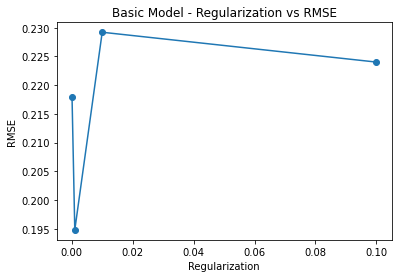

In [ ]:
#Draw plot between regularization vs RMSE
colors = (0,0,0)
area = np.pi*3
plt.plot(reg,RMSE, '-o')
plt.title('Basic Model - Regularization vs RMSE')
plt.xlabel('Regularization')
plt.ylabel('RMSE')
plt.show()

**Analysis :** Considered model with one hidden layers and ran for different L1 regularization values.As per the result,this parameter didn't offer much learning to the network.

**Hyper Parameter Tuning**

In [ ]:
def get_model_hp(dense_0_neurons, dense_1_neurons, input_dim, num_op):
    # Builds a Sequential MLP model using Keras and returns it
    
    # Define the keras model
    model = Sequential()
    model.add(Dense(dense_0_neurons, input_dim=input_dim, activation='relu', name="dense_1"))
    model.add(Dense(dense_1_neurons, activation='relu',name="dense_2"))
   # model.add(Dropout(dropout_rate, name="dropout"))
    model.add(Dense(num_op, activation='sigmoid', name="dense_3"))
    return model

In [ ]:
import skopt
from skopt import gp_minimize
# Specify `Static' Parameters
STATIC_PARAMS = {n_features, n_opneurons}
SPACE = [skopt.space.Integer(4, 1200, name='dense_0_neurons'),
         skopt.space.Integer(9, 600, name='dense_1_neurons')]
@skopt.utils.use_named_args(SPACE)
# Define objective for optimization
def objective(**params):
    model_hp = get_model_hp(params["dense_0_neurons"], params["dense_1_neurons"], n_features, n_opneurons)
    # Compile the keras model for a specified number of epochs.
    model_hp.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
   
    # Fit keras model
    
    history_hp = model_hp.fit(X_train, y_train, epochs=90,verbose=0)
    yhat = model_hp.predict(X_test)
    scores_hp = np.sqrt(metrics.mean_squared_error(y_test, yhat))


    # Return the accuracy.
    return 1.0 * scores_hp

In [ ]:
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

results_gp = skopt.gp_minimize(objective,     # the function to minimize
                          SPACE,              # the bounds on each dimension of x
                          x0=[4,9],      # the starting point
                          acq_func="LCB",     # the acquisition function (optional)
                          n_calls=6,         # the number of evaluations of f including at x0
                          n_random_starts=4,random_state=0)

In [ ]:
print("""Best parameters:
- dense_0_neurons=%d
- dense_1_neurons=%d
""" % 
      (results_gp.x[0], results_gp.x[1]))
"Best score=%.4f" % results_gp.fun

Best parameters:
- dense_0_neurons=1030
- dense_1_neurons=510



'Best score=0.1014'

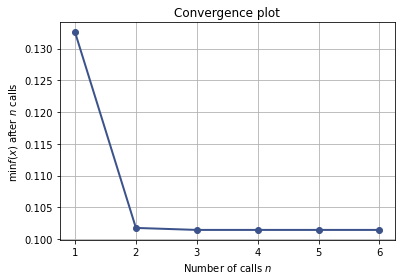

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(results_gp)

**Analysis :** Best model RMSE value is 10% with 1030 input neurons and 510 hidden layer neurons and it is achieved at iteration 2. Below graph shows RMSE values for each iteration of hyper parameter tuning and optimal parameters are changing for each run so decided to use cross validation within the skopt model. Even though this is resulted less RMSE. This model is likely memorizing it so it is a good idea to check with cross validation

**Model - With Cross Validation**

In [ ]:
# prepare cross validation
kfold = KFold(n_splits=10)
# enumerate splits
cvscores = []
Model_cv=[]
run=[1,2,3,4,5]
for i in range(len(run)):
  for train_index, test_index in kfold.split(xscale):
    X_train, X_test = xscale[train_index], xscale[test_index]
    y_train, y_test = yscale[train_index], yscale[test_index]
    model_cv = Sequential()
    model_cv.add(Dense(4, input_dim=6, kernel_initializer='he_normal', activation='relu', name="dense_1"))
    #model_cv.add(Dense(9, activation='relu',kernel_regularizer=l1(0.001), bias_regularizer=l1(0.001), name="dense_2"))
    model_cv.add(Dense(9, activation='relu',kernel_regularizer=l1(0.001), bias_regularizer=l1(0.001), name="dense_2"))
    #model_cv.add(Dense(9, activation='relu', name="dense_3"))
    model_cv.add(Dense(4, activation='sigmoid', name="dense_4"))
    model_cv.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    model_cv.fit(X_train, y_train, epochs=90, batch_size=1, verbose=0)
    model_predict_cv = model_cv.predict(X_test)
  scores = np.sqrt(metrics.mean_squared_error(y_test, model_predict_cv))
  #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  Model_cv.append(np.mean(cvscores))



0.13% (+/- 0.00%)
0.14% (+/- 0.02%)
0.16% (+/- 0.02%)
0.15% (+/- 0.02%)
0.15% (+/- 0.02%)


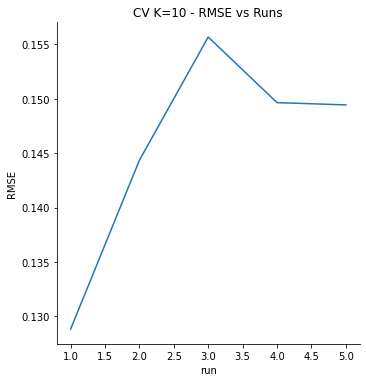

In [ ]:
Model_cv

#plot RMSE and runs
df_cv=pd.DataFrame({'run': run,
     'RMSE': Model_cv

    })

sns.relplot(data=df_cv, x="run", y="RMSE",  kind="line").set(title='CV K=10 - RMSE vs Runs')


#sns.relplot(x="time", y="value", kind="line", data=df)

**Model - LOO**

In [ ]:
scores = []
loo = LeaveOneOut()
loo.get_n_splits(xscale)
Model_loo=[]
run=[1,2,3]
for i in range(len(run)):
  for train_index, test_index in loo.split(xscale):
    X_train, X_test = xscale[train_index], xscale[test_index]
    y_train, y_test = yscale[train_index], yscale[test_index]
    model_loo = Sequential()
    model_loo.add(Dense(4, input_dim=6, kernel_initializer='he_normal', activation='relu', name="dense_1"))
    model_loo.add(Dense(9, activation='relu',name="dense_2"))
  #model_loo.add(Dense(9, activation='relu',kernel_regularizer=l1(0.001), bias_regularizer=l1(0.001), name="dense_3"))
    model_loo.add(Dense(4, activation='sigmoid', name="dense_4"))
    model_loo.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

    model_loo.fit(X_train, y_train, epochs=90, batch_size=1, verbose=0)
    yhat = model_loo.predict(X_test)
    scores1 = np.sqrt(metrics.mean_squared_error(y_test, yhat))
    print('>%.3f' % scores1)
    scores.append(scores1)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))
  Model_loo.append(np.mean(scores))





>0.085
>0.155
>0.182
>0.104
>0.140
>0.090
>0.098
>0.053
>0.146
>0.080
>0.200
>0.084
>0.299
>0.128
>0.173
>0.221
>0.077
>0.325
>0.250
>0.215
>0.128
>0.160
>0.151
>0.413
>0.055
>0.130
>0.170
>0.134
>0.303
>0.125
>0.146
>0.228
>0.440
>0.073
>0.134
>0.080
>0.322
>0.115
>0.216
>0.143
>0.127
>0.063
>0.058
>0.046
>0.055
>0.059
>0.138
>0.108
>0.179
>0.088
>0.100
>0.114
>0.134
0.15% (+/- 0.09%)
>0.038
>0.117
>0.156
>0.055
>0.109
>0.145
>0.109
>0.085
>0.159
>0.287
>0.270
>0.051
>0.236
>0.052
>0.146
>0.318
>0.043
>0.274
>0.260
>0.234
>0.213
>0.152
>0.124
>0.405
>0.099
>0.096
>0.142
>0.143
>0.283
>0.166
>0.122
>0.303
>0.245
>0.078
>0.150
>0.088
>0.247
>0.105
>0.165
>0.064
>0.119
>0.058
>0.087
>0.048
>0.061
>0.070
>0.144
>0.119
>0.145
>0.122
>0.136
>0.093
>0.122
0.15% (+/- 0.09%)
>0.101
>0.133
>0.131
>0.140
>0.079
>0.081
>0.167
>0.069
>0.229
>0.302
>0.252
>0.067
>0.260
>0.194
>0.116
>0.318
>0.124
>0.319
>0.196
>0.260
>0.068
>0.053
>0.096
>0.425
>0.051
>0.098
>0.162
>0.124
>0.303
>0.202
>0.190
>0.28

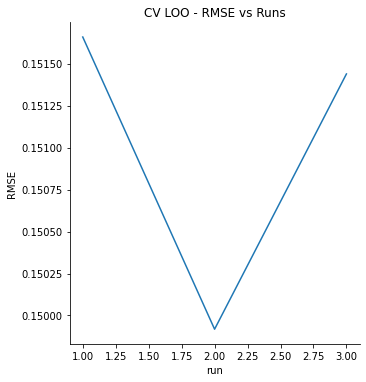

In [ ]:

#plot RMSE and runs
df_loo=pd.DataFrame({'run': run,
     'RMSE': Model_loo

    })

sns.relplot(data=df_loo, x="run", y="RMSE",  kind="line").set(title='CV LOO - RMSE vs Runs')


#sns.relplot(x="time", y="value", kind="line", data=df)

**1.**K=10-fold cross validation improved the performance of the model. RMSE value is approx..15% with std of +/- 2%. Below graph shows the plot of cross validation model for multiple runs.
**2.**Leave One Out cross validation didn’t show much improvement in model performance compared to K=10 cross validation. Below plot shows RMSE values for 3 runs.

**Model - CV,Hyper Paramter tuning**

In [ ]:
import skopt
from skopt import gp_minimize
# Specify `Static' Parameters
STATIC_PARAMS = {n_features, n_opneurons}
SPACE = [skopt.space.Integer(4, 100, name='dense_0_neurons'),
         skopt.space.Integer(9, 70, name='dense_1_neurons'),
        skopt.space.Real(0.0, 0.3, name='dropout_rate')]
@skopt.utils.use_named_args(SPACE)
# Define objective for optimization
def objective1(**params):
  scores = []
  #loo = LeaveOneOut()
  loo = KFold(10)
  loo.get_n_splits(xscale)
  for train_index, test_index in loo.split(xscale):
    #print(train_index)
    X_train, X_test = xscale[train_index], xscale[test_index]
    y_train, y_test = yscale[train_index], yscale[test_index]
    #y_train, y_test = y_train.reshape((len(y_train),4)), y_test.reshape((len(y_test),4))
    model = Sequential()
    model.add(Dense(params["dense_0_neurons"], input_dim=n_features, kernel_initializer='normal', activation='relu', name="dense_1"))
    model.add(Dense(params["dense_1_neurons"], activation='relu', name="dense_2"))
    #model.add(Dense(dense_2_neurons, activation='relu', name="dense_3"))
    model.add(Dropout( params["dropout_rate"], name="dropout"))
    model.add(Dense(n_opneurons, activation='sigmoid', name="dense_4"))
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    model.fit(X_train, y_train, epochs=90, batch_size=1, verbose=0)
    yhat = model.predict(X_test)
    scores1 = np.sqrt(metrics.mean_squared_error(y_test, yhat))
    #print('>%.3f' % scores1)
    scores.append(scores1)
  #print("%.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))
      # Return the accuracy.
  return np.mean(scores)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

results_gp_cv = skopt.gp_minimize(objective1,     # the function to minimize
                          SPACE,              # the bounds on each dimension of x
                          x0=[4,9,0],      # the starting point
                          acq_func="LCB",     # the acquisition function (optional)
                          n_calls=6,         # the number of evaluations of f including at x0
                          n_random_starts=4,random_state=0)

In [ ]:
print("""Best parameters:
- dense_0_neurons=%d
- dense_1_neurons=%d
- dropout_rate=%.6f""" % 
      (results_gp_cv.x[0], results_gp_cv.x[1],
                            results_gp_cv.x[2]))
"Best score=%.4f" % results_gp_cv.fun

Best parameters:
- dense_0_neurons=50
- dense_1_neurons=59
- dropout_rate=0.143993


'Best score=0.1437'

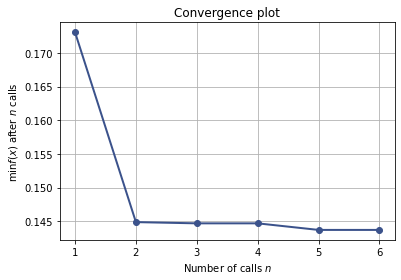

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(results_gp_cv)

**Analysis** :This model resulted RMSE 14% with 50 input neurons,59 hidden neurons and 0.14 is the drop-out rate for K=10. Below is the plot of RMSE for different calls.It is a good idea to test the model with CV K=10 and neurons obtained from the above skopt model

**Model with Hyper paramters and CV K=10**

In [ ]:
# prepare cross validation
kfold = KFold(n_splits=10)
# enumerate splits
score_f = []
Model_f=[]
run_f=[1,2,3,4,5]
for i in range(len(run_f)):
  for train_index, test_index in kfold.split(xscale):
    X_train, X_test = xscale[train_index], xscale[test_index]
    y_train, y_test = yscale[train_index], yscale[test_index]
    model_f = Sequential()
    model_f.add(Dense(50, input_dim=6, kernel_initializer='he_normal', activation='relu', name="dense_1"))
    model_f.add(Dense(59, activation='relu', name="dense_2"))
    #model_f.add(Dropout(0.1437, name="dropout"))    
    model_f.add(Dense(4, activation='sigmoid', name="dense_4"))
    model_f.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history_f=model_f.fit(X_train, y_train, epochs=90,validation_split=0.0, batch_size=1, verbose=0)
    model_predict_cv = model_f.predict(X_test)
  scores = np.sqrt(metrics.mean_squared_error(y_test, model_predict_cv))
  #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  score_f.append(scores)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(score_f), np.std(score_f)))
  Model_f.append(np.mean(score_f))


0.11% (+/- 0.00%)
0.11% (+/- 0.00%)
0.12% (+/- 0.00%)
0.13% (+/- 0.02%)
0.13% (+/- 0.02%)


In [ ]:
Model_f

[0.11455722901973321,
 0.11474922195111405,
 0.11598530552272057,
 0.126647402035687,
 0.12992919171795983]

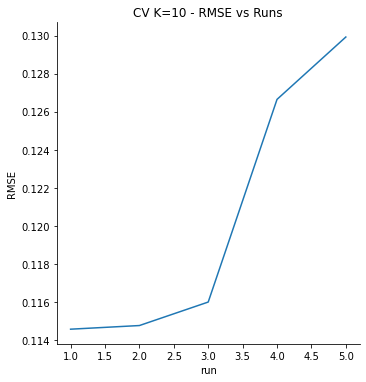

In [ ]:
#plot RMSE and runs
df_cv=pd.DataFrame({'run': run_f,
     'RMSE': Model_f

    })

sns.relplot(data=df_cv, x="run", y="RMSE",  kind="line").set(title='CV K=10 - RMSE vs Runs')


#sns.relplot(x="time", y="value", kind="line", data=df)

**Analysis :** Model gave promising results with obtained paramters and now model performnace is <13 % RMSE value

**SKOPT optimization with LOOCV**

In [8]:
import skopt
from skopt import gp_minimize
# Specify `Static' Parameters
STATIC_PARAMS = {n_features, n_opneurons}
SPACE2 = [skopt.space.Integer(4, 100, name='dense_0_neurons'),
         skopt.space.Integer(9, 70, name='dense_1_neurons'),
        skopt.space.Real(0.0, 0.3, name='dropout_rate')]
@skopt.utils.use_named_args(SPACE2)
# Define objective for optimization
def objective2(**params):
  scores = []
  loo = LeaveOneOut()
  #loo = KFold(10)
  loo.get_n_splits(xscale)
  for train_index, test_index in loo.split(xscale):
    #print(train_index)
    X_train, X_test = xscale[train_index], xscale[test_index]
    y_train, y_test = yscale[train_index], yscale[test_index]
    #y_train, y_test = y_train.reshape((len(y_train),4)), y_test.reshape((len(y_test),4))
    model = Sequential()
    model.add(Dense(params["dense_0_neurons"], input_dim=n_features, kernel_initializer='normal', activation='relu', name="dense_1"))
    model.add(Dense(params["dense_1_neurons"], activation='relu', name="dense_2"))
    #model.add(Dense(dense_2_neurons, activation='relu', name="dense_3"))
    model.add(Dropout( params["dropout_rate"], name="dropout"))
    model.add(Dense(n_opneurons, activation='sigmoid', name="dense_4"))
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    model.fit(X_train, y_train, epochs=90, batch_size=1, verbose=0)
    yhat = model.predict(X_test)
    scores1 = np.sqrt(metrics.mean_squared_error(y_test, yhat))
    #print('>%.3f' % scores1)
    scores.append(scores1)
  #print("%.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))
      # Return the accuracy.
  return np.mean(scores)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

results_gp_cv = skopt.gp_minimize(objective2,     # the function to minimize
                          SPACE2,              # the bounds on each dimension of x
                          x0=[4,9,0],      # the starting point
                          acq_func="LCB",     # the acquisition function (optional)
                          n_calls=6,         # the number of evaluations of f including at x0
                          n_random_starts=4,random_state=0)

In [ ]:
"Best score=%.4f" % results_gp_cv.fun

print("""Best parameters:
- dense_0_neurons=%d
- dense_1_neurons=%d
- dropout_rate=%.6f""" % 
      (results_gp_cv.x[0], results_gp_cv.x[1],
                            results_gp_cv.x[2]))

Best parameters:
- dense_0_neurons=85
- dense_1_neurons=47
- dropout_rate=0.115315


In [ ]:
"Best score=%.4f" % results_gp_cv.fun

'Best score=0.1229'

**Analysis** :  This model resulted lowest RMSE value 11.5%.Looks like this gave us better score.So let us try to run the model with leave one out for these values.


**Final Model**

In [ ]:
# prepare cross validation
loo = LeaveOneOut()
loo.get_n_splits(xscale)
# enumerate splits
score_f1 = []
Model_f1=[]
run_f=[1,2,3]
for i in range(len(run_f)):
  for train_index, test_index in loo.split(xscale):
    X_train, X_test = xscale[train_index], xscale[test_index]
    y_train, y_test = yscale[train_index], yscale[test_index]
    model_f1 = Sequential()
    model_f1.add(Dense(85, input_dim=6, kernel_initializer='he_normal', activation='relu', name="dense_1"))
    model_f1.add(Dense(47, activation='relu', name="dense_2"))
    #model_f.add(Dropout(0.11, name="dropout"))    
    model_f1.add(Dense(4, activation='sigmoid', name="dense_4"))
    model_f1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history_f1=model_f1.fit(X_train, y_train, epochs=90,validation_split=0.0, batch_size=1, verbose=0)
    model_predict_cv1 = model_f1.predict(X_test)
  scores_f1 = np.sqrt(metrics.mean_squared_error(y_test, model_predict_cv1))
  #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  score_f1.append(scores_f1)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(scores_f1), np.std(scores_f1)))
  Model_f1.append(np.mean(scores_f1))


0.11% (+/- 0.00%)
0.10% (+/- 0.00%)
0.11% (+/- 0.00%)


In [ ]:
Model_f1

[0.11208400844267025, 0.09936204418368941, 0.10624459584324579]

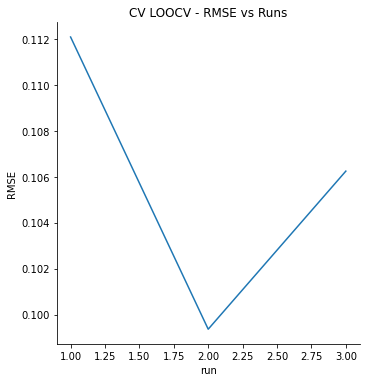

In [ ]:
#plot RMSE and runs
df_loocv=pd.DataFrame({'run': run_f,
     'RMSE': Model_f1

    })

sns.relplot(data=df_loocv, x="run", y="RMSE",  kind="line").set(title='CV LOOCV - RMSE vs Runs')


**Final Model:** This is model given best performance so far with 11% RMSE value.This model can be tuned further with callback strategy.